# Quickstart (CLI)

This document is for teach the basic usage of CoolBox's Command Line Interface.

Interactive online version: [binder](https://mybinder.org/v2/gh/GangCaoLab/CoolBox/HEAD?filepath=docs%2Fsource%2Fquick_start_CLI.ipynb)

CoolBox CLI is a chainable command tool which can compose
complex frame as easily with very intuition syntax.

![fig_CLI](../images/fig_CLI.png)

## Check the basic information

Firstly, check the coolbox version:

In [1]:
%%bash

coolbox version

0.3.0


CoolBox CLI is composed by many chainable sub-commands,
we can print the help information to list them:

In [2]:
%%bash

coolbox

NAME
    coolbox - CoolBox Command Line Interface

SYNOPSIS
    coolbox - GROUP | COMMAND | VALUE

DESCRIPTION
    You can use this cli to create coolbox browser instance,
    visualize your data directly in shell.

    example:

    1. Draw tracks within a genome range, save figure to a pdf file:

        $ coolbox add XAxis - add BigWig test.bw - goto "chr1:5000000-6000000" - plot test.pdf

    2. Generate a notebook and run jupyter to open browser:

        $ coolbox add XAxis - add BigWig test.bw - goto "chr1:5000000-6000000" - run_jupyter

    3. Run a independent web application.

        $ coolbox add XAxis - add BigWig test.bw - goto "chr1:5000000-6000000" - run_webapp

GROUPS
    GROUP is one of the following:

     current_range

     frames

COMMANDS
    COMMAND is one of the following:

     add
       Add a Element(Track, Coverage, Feature), for example: coolbox add XAxis

     end_with
       End the with block

     gen_notebook
       Generate The notebook contain codes

## Example Dataset

Here, we use [a small testing dataset](https://github.com/GangCaoLab/CoolBox/tree/master/tests/test_data) for convenient.
This dataset contains files in differnet file formats,
and they are in same genome range(chr9:4000000-6000000) of a reference genome (hg19).

In [3]:
%%bash

echo Current working directory: $PWD

Current working directory: /home/nanguage/DATA2/Dropbox/workspace/CoolBox/docs/source


In [4]:
%%bash

ls -lh ../../tests/test_data

total 95M
-rw-rw-r-- 1 nanguage nanguage 787K 10月 27 09:50 bam_chr9_4000000_6000000.bam
-rw-rw-r-- 1 nanguage nanguage 8.6K 10月 27 09:50 bed_chr9_4000000_6000000.bed
-rw-rw-r-- 1 nanguage nanguage  18K 10月 27 20:35 bedgraph_chr9_4000000_6000000.bg
-rw-rw-r-- 1 nanguage nanguage  264 10月 28 10:11 bedpe_chr9_4000000_6000000.bedpe
-rw-rw-r-- 1 nanguage nanguage  31K 10月 27 09:50 bigwig_chr9_4000000_6000000.bw
-rw-rw-r-- 1 nanguage nanguage  24M 1月  15 17:39 cool_chr1_89000000_90400000_for_cmp_1.mcool
-rw-rw-r-- 1 nanguage nanguage  23M 1月  15 17:33 cool_chr1_89000000_90400000_for_cmp_2.mcool
-rw-rw-r-- 1 nanguage nanguage  27M 10月 27 09:50 cool_chr9_4000000_6000000.mcool
-rw-rw-r-- 1 nanguage nanguage  14M 1月  15 22:26 dothic_chr9_4000000_6000000.hic
-rw-rw-r-- 1 nanguage nanguage 9.3M 12月 30 15:50 down100.ctcf.pkl
-rw-rw-r-- 1 nanguage nanguage 535K 10月 27 09:50 gtf_chr9_4000000_6000000.gtf
-rw-rw-r-- 1 nanguage nanguage  33K 10月 27 09:50 hg19_ideogram.txt
-rw-rw-r-- 1 nanguage nanguage 

## Compose Frame

CoolBox CLI is designed for compose Frame object by a command chain.
The key command of the chain is the `add` sub-command,
It just like the `+` operator in CoolBox API.

In [5]:
%%bash

coolbox add -- --help

NAME
    coolbox add - Add a Element(Track, Coverage, Feature), for example: coolbox add XAxis

SYNOPSIS
    coolbox add ELEM_STR <flags> [ARGS]...

DESCRIPTION
    Add a Element(Track, Coverage, Feature), for example: coolbox add XAxis

POSITIONAL ARGUMENTS
    ELEM_STR
        Element type string. Like BAM, BigWig, Cool ... Full list of Track types can be found here(https://gangcaolab.github.io/CoolBox/quick_start_API.html#Track-types).
    ARGS
        Positional args for create elements.

FLAGS
    Flags are accepted.
        Keyword args for create elements.

NOTES
    You can also use flags syntax for POSITIONAL ARGUMENTS


Here, give a example of draw a figure using CoolBox CLI:

In [6]:
%%bash

DIR=../../tests/test_data

coolbox add XAxis - \
add Cool $DIR/cool_chr9_4000000_6000000.mcool - \
add Title "cool" - \
add BAMCov $DIR/bam_chr9_4000000_6000000.bam - \
add Title "bam" - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
add Title "bigwig" - \
goto "chr9:4000000-6000000" - \
plot /tmp/test_coolbox.jpg

We have draw a figure and save it to `/tmp/test_coolbox.jpg`, let's take a look:

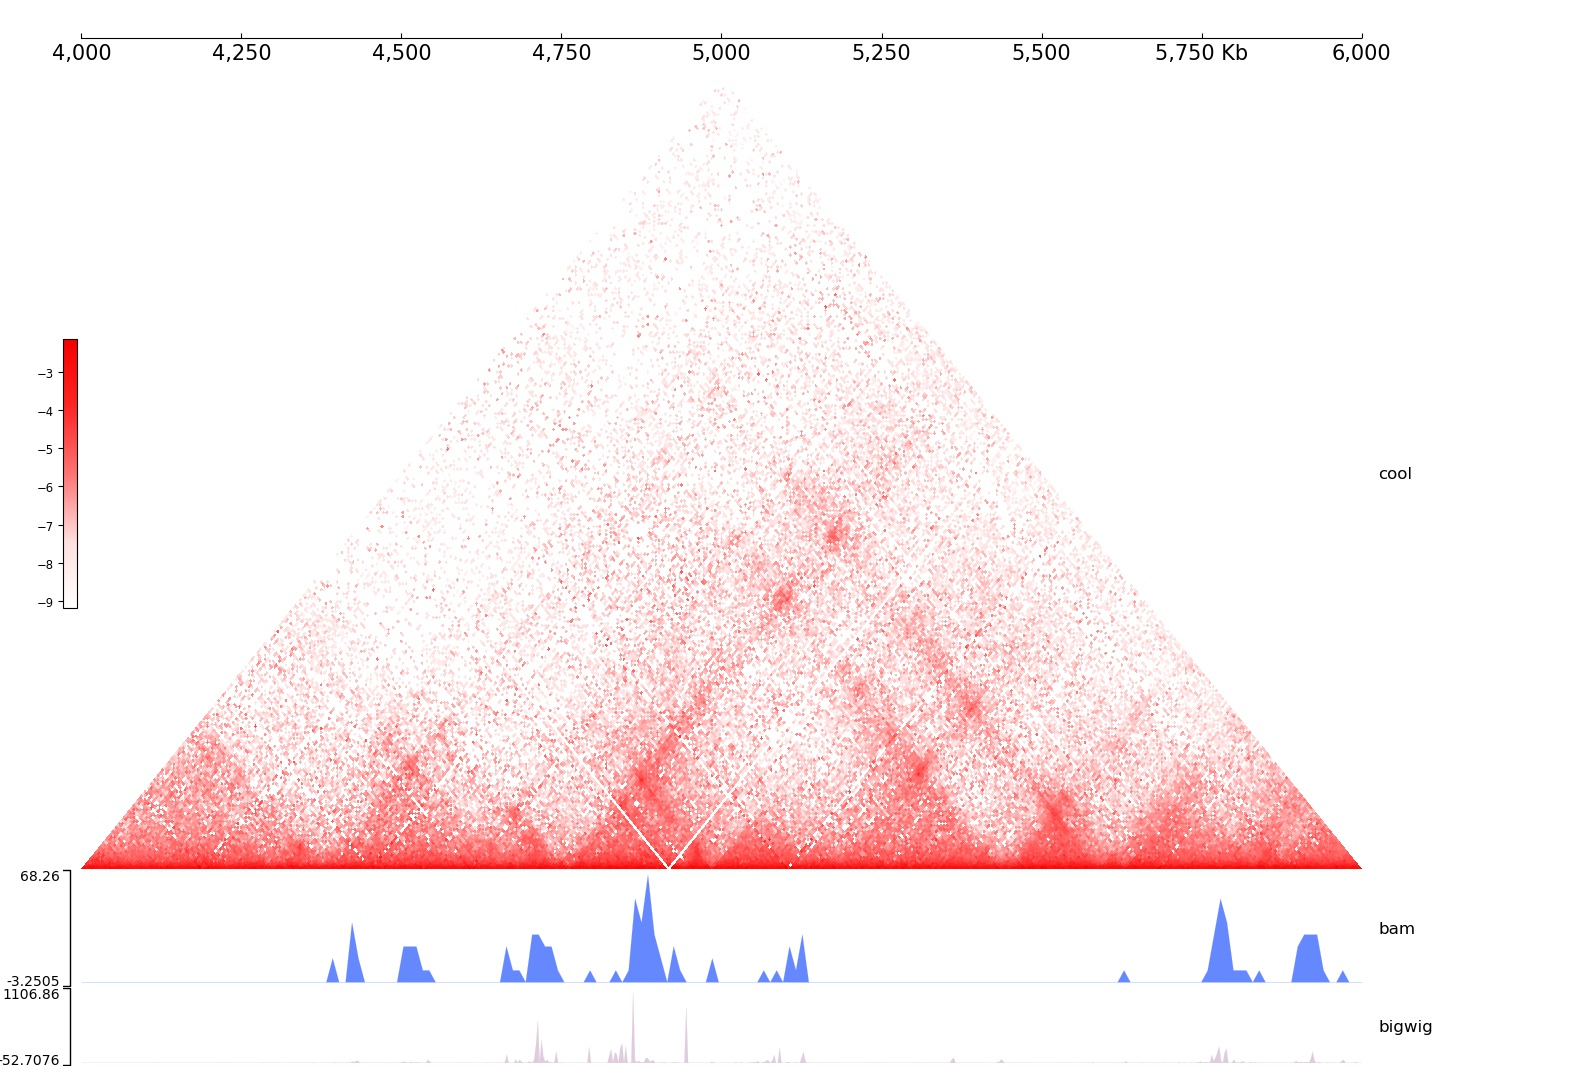

In [7]:
from IPython.display import Image
Image(filename='/tmp/test_coolbox.jpg') 

As we can see, we compose our data using the `add` command,
then plot the figure.

The first argument of `add` is the coolbox element type name.
The most frequently used element is the `Track`,
all `Track` type can be found [here](https://gangcaolab.github.io/CoolBox/quick_start_API.html#Track-types)

### with block

For modify features or add coverage to a group of tracks, you can use the `with` block, 
it's the equivalent of the [`with statement` in API](https://gangcaolab.github.io/CoolBox/quick_start_API.html#with-statement). 

For example modify track's color:

In [8]:
%%bash 

DIR=../../tests/test_data

coolbox add XAxis - \
start_with Color "#ffcc66" - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
end_with - \
start_with Color "#cc66ff" - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
end_with - \
goto "chr9:4000000-6000000" - \
plot /tmp/test_coolbox.jpg

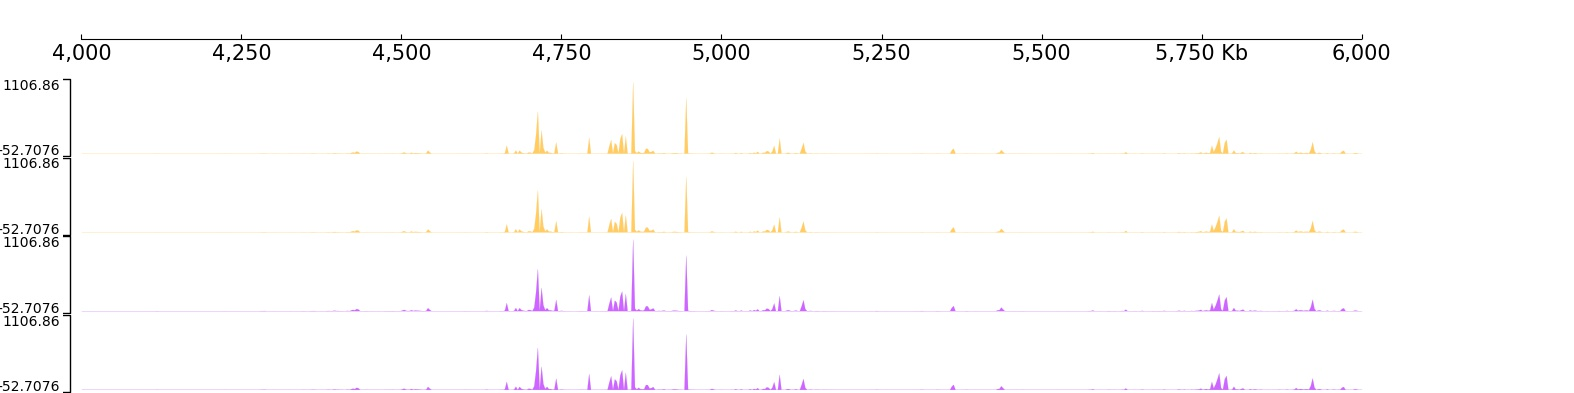

In [9]:
from IPython.display import Image
Image(filename='/tmp/test_coolbox.jpg') 

Apply Vlines coverage:

In [10]:
%%bash 

DIR=../../tests/test_data

coolbox add XAxis - \
start_with Vlines "['chr9:4500000-4500000', 'chr9:5000000-5000000']" - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
add BigWig $DIR/bigwig_chr9_4000000_6000000.bw - \
end_with - \
goto "chr9:4000000-6000000" - \
plot /tmp/test_coolbox.jpg

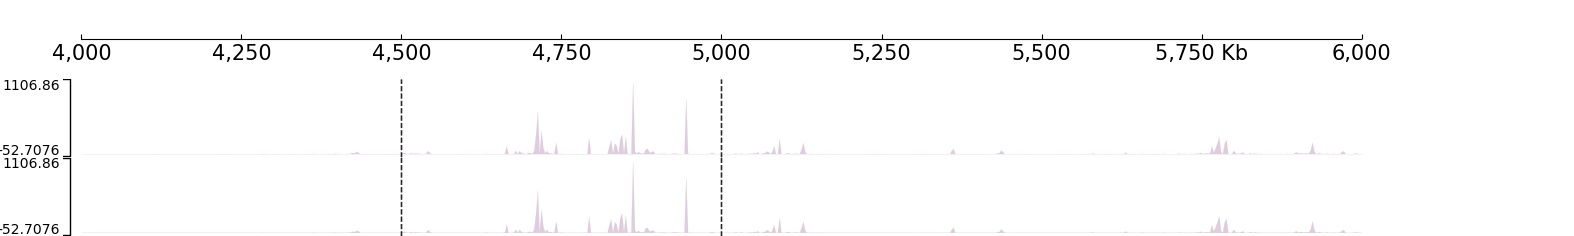

In [11]:
from IPython.display import Image
Image(filename='/tmp/test_coolbox.jpg') 

## Start a browser

CoolBox `CLI` can automatically generate
a notebook which contain the 
browser composition code equivalent to using CoolBox `API`.

And this notebook will be run in Jupyter environment or Volia webapp.
Then you can open your web browser to use this GUI to explore your genomic data, for example:

```Bash
$ coolbox add XAxis - \
add Cool ./tests/test_data/cool_chr9_4000000_6000000.mcool - \
add BAM ./tests/test_data/bam_chr9_4000000_6000000.bam - \
add BigWig ./tests/test_data/bigwig_chr9_4000000_6000000.bw - \
goto "chr9:4000000-6000000" - \
run_jupyter
```

This will start a jupyter server and run a coolbox browser within the notebook.
And you can also to run a independent web app using similar command:

```Bash
$ coolbox add XAxis - \
add Cool ./tests/test_data/cool_chr9_4000000_6000000.mcool - \
add BAM ./tests/test_data/bam_chr9_4000000_6000000.bam - \
add BigWig ./tests/test_data/bigwig_chr9_4000000_6000000.bw - \
goto "chr9:4000000-6000000" - \
run_webapp
```

More detail usage see the help info:

In [12]:
%%bash

coolbox run_jupyter -- --help

NAME
    coolbox run_jupyter - Create a notebook according to command line, then start a jupyter process.

SYNOPSIS
    coolbox run_jupyter <flags>

DESCRIPTION
    Create a notebook according to command line, then start a jupyter process.

FLAGS
    --jupyter_args=JUPYTER_ARGS
        Arguments for run jupyter.


In [13]:
%%bash

coolbox run_webapp -- --help

NAME
    coolbox run_webapp - Run a independent coolbox browser web app. (Create notebook and run voila)

SYNOPSIS
    coolbox run_webapp <flags>

DESCRIPTION
    Run a independent coolbox browser web app. (Create notebook and run voila)

FLAGS
    --voila_args=VOILA_ARGS
        Arguments for run jupyter.


## Load custom module

We can load the custom defined module(`.py` file) with the `load_module` command.
For example, there are a simple custom defined track in `custom_track.py`:

In [14]:
%%bash

DIR=../../tests/

cat $DIR/custom_track.py

from coolbox.core.track.base import Track


class CustomTrack(Track):
    def __init__(self):
        super().__init__(properties_dict={})

    def fetch_data(self, gr, **kwargs):
        return "Test Custom"

    def plot(self, ax, gr, **kwargs):
        x = gr.start + gr.length * 0.33
        ax.text(x, 0, self.fetch_data(gr), fontsize=50)
        ax.set_xlim(gr.start, gr.end)


We can load it from the file with `load_module` then use it to draw a plot:

In [15]:
%%bash

DIR=../../tests/

coolbox - load_module $DIR/custom_track.py - \
    add XAxis - \
    add CustomTrack - \
    goto "chr1:10000-20000" - \
    plot /tmp/test_coolbox_custom_cli.png

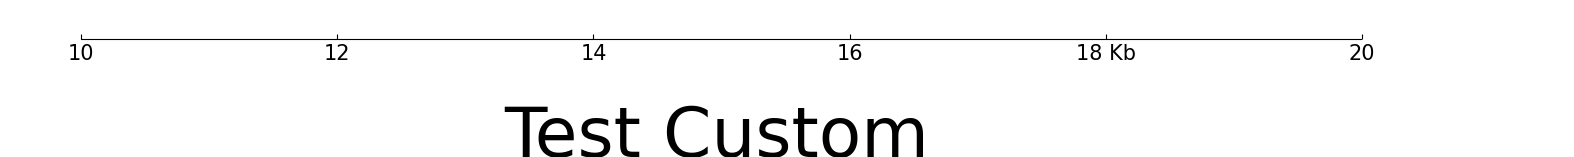

In [16]:
Image(filename='/tmp/test_coolbox_custom_cli.png') 